## You will build a model with the movie reviews dataset that you worked with in Week 3: Bag of Words Meets Bags of Popcorn. 

### 1. Get the stemmed data using the same process you did in Week 3.

In [76]:
! pip install yellowbrick
import yellowbrick

In [77]:
#import necessary packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [78]:
# import tsv file as dataframe
df = pd.read_csv('labeledTrainData.tsv',sep = '\t') 
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [79]:
# Installation of TextBlob in system
! pip install -U textblob
# For the uninitiated – practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora
! python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [80]:
# import TextBlob
from textblob import TextBlob
# Classify each movie review as positive or negative (assuming polarity greater than 0 is positive sentiment, and less than 0 is negative sentiment)
df[['polarity', 'subjectivity']] = df['review'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df.head(5)

,id,sentiment,review,polarity,subjectivity
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818


In [81]:
# Create textblob_score column based on the polarity column
df['textblob_score'] = df['polarity'].apply(lambda x: 1 if x > 0 else 0)
df.head(5)

,id,sentiment,review,polarity,subjectivity,textblob_score
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0


In [82]:
# Convert all text to lowercase
df['review'] = df['review'].str.lower() # use str.lower to convert all text to lowercase letters
# Remove punctuation and special characters
df['review'] = df['review'].str.replace(r'[^\w\s]+', '') # use str.replace to remove all the special characters
df.head(5)

,id,sentiment,review,polarity,subjectivity,textblob_score
0,5814_8,1,with all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,the classic war of the worlds by timothy hines...,0.256349,0.531111,1
2,7759_3,0,the film starts with a manager nicholas bell g...,-0.053941,0.562933,0
3,3630_4,0,it must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0


In [83]:
# Remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english') # Import stopwords with nltk
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kadams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,sentiment,review,polarity,subjectivity,textblob_score
0,5814_8,1,stuff going moment mj ive started listening mu...,0.001277,0.606746,1
1,2381_9,1,classic war worlds timothy hines entertaining ...,0.256349,0.531111,1
2,7759_3,0,film starts manager nicholas bell giving welco...,-0.053941,0.562933,0
3,3630_4,0,must assumed praised film greatest filmed oper...,0.134753,0.492901,1
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...,-0.024842,0.459818,0


In [84]:
# pg 100: Stemming reduces a word to its stem by identifying and removing affixes (e.g. gerunds) keeping the root meaning of the word
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [85]:
porter_stemmer = PorterStemmer() #create porter_stemmer variable

In [86]:
# https://stackoverflow.com/questions/43795310/apply-porters-stemmer-to-a-pandas-column-for-each-word
# Tokenize the sentences
df['review_tokenized']=df['review'].apply(lambda x : filter(None,x.split(" ")))

In [87]:
# Apply stemmer to the above tokenized column as follows
df['review_stemmed']=df['review_tokenized'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [89]:
# Go back to review in sentence format
df['review_stemmed_sentence']=df['review_stemmed'].apply(lambda x : " ".join(x))
df.head(5)

,id,sentiment,review,polarity,subjectivity,textblob_score,review_tokenized,review_stemmed,review_stemmed_sentence
0,5814_8,1,stuff going moment mj ive started listening mu...,0.001277,0.606746,1,<filter object at 0x0000019CF3387880>,"[stuff, go, moment, mj, ive, start, listen, mu...",stuff go moment mj ive start listen music watc...
1,2381_9,1,classic war worlds timothy hines entertaining ...,0.256349,0.531111,1,<filter object at 0x0000019CF33876D0>,"[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,7759_3,0,film starts manager nicholas bell giving welco...,-0.053941,0.562933,0,<filter object at 0x0000019CF3387A30>,"[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,3630_4,0,must assumed praised film greatest filmed oper...,0.134753,0.492901,1,<filter object at 0x0000019CF3387310>,"[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...,-0.024842,0.459818,0,<filter object at 0x0000019CF33879D0>,"[superbl, trashi, wondrous, unpretenti, 80, ex...",superbl trashi wondrous unpretenti 80 exploit ...


In [90]:
# look at shpae of dataframe with new columns
df.shape

(25000, 9)

In [91]:
# look at column type of each column
df.dtypes

id                          object
sentiment                    int64
review                      object
polarity                   float64
subjectivity               float64
textblob_score               int64
review_tokenized            object
review_stemmed              object
review_stemmed_sentence     object
dtype: object

### 2. Split this into a training and test set (this = labeled train data in Kaggle)

In [92]:
#split the data into a training and test set
X = df['review_stemmed_sentence']
#get the target
y = df['sentiment']
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [93]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many sentiments are in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(20000,)
(5000,)
1    10021
0     9979
Name: sentiment, dtype: int64
0    2521
1    2479
Name: sentiment, dtype: int64


In [94]:
#look for missing data in the training and test sets
print(X_train.isna().sum())
print(X_test.isna().sum())

# No missing data :)

0
0


### 3. Fit and apply the tf-idf vectorization to the training set.

In [95]:
# Create the tf-idf feature matrix
tfidfs = TfidfVectorizer()
x_train_vector = tfidfs.fit_transform(X_train)

In [96]:
# look at the shape of the transformed X_train_vector
x_train_vector.shape

(20000, 81511)

### 4. Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [97]:
x_test_vector = tfidfs.transform(X_test)

# Answer: You wouldn't want to fit the test set to the model because then you'd have test data leaking into the model

In [98]:
x_test_vector.shape

(5000, 81511)

### 5. Train a logistic regression using the training data.

In [99]:
#import logistic regression model
from sklearn.linear_model import LogisticRegression

#import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [100]:
#instantiate the logistic regression model 
logreg_model = LogisticRegression(max_iter = 500)
#fit the model to the training set
logreg_model.fit(x_train_vector, y_train) # replace x_train with x_train_vector so you can do the regression model on the vectorized data

LogisticRegression(max_iter=500)

### 6. Find the model accuracy on test set and create a confusion matrix for the test set predictions.

Model Accuracy: 88.08%


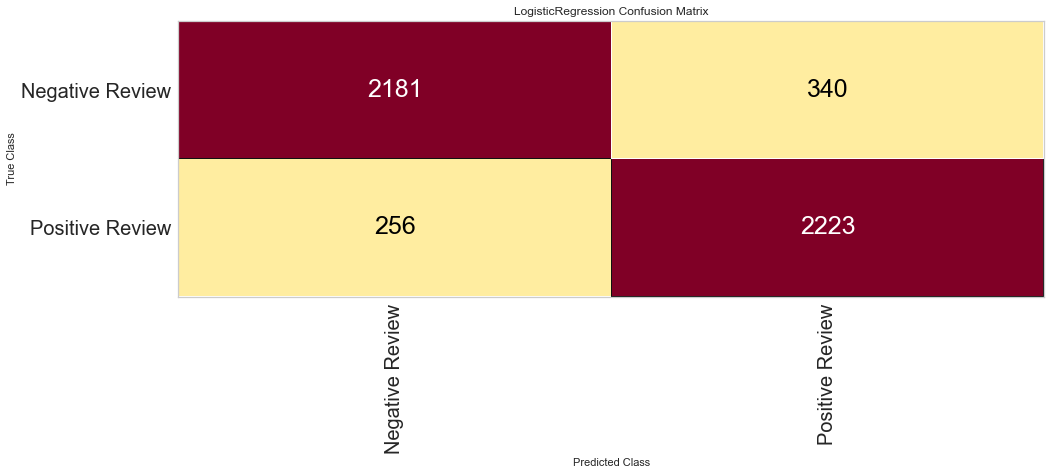

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [101]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['Negative Review','Positive Review']
# Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.
label_encoder = {0: 'Negative Review', 1: 'Positive Review'}

#initialize the confusion matrix
cm = ConfusionMatrix(logreg_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(x_test_vector, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

### 8. Get the precision, recall, and F1-score for the test set predictions.

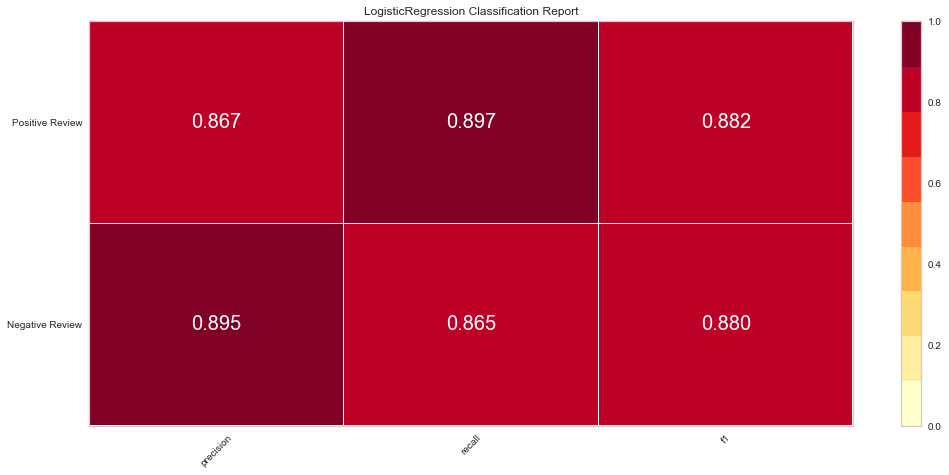

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [102]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(logreg_model, encoder = label_encoder)

#fit the classification report to the test data
class_report.fit(x_train_vector, y_test)  
#evaluate the model on the test data
class_report.score(x_test_vector, y_test)  
class_report.show()

### 9. Create a ROC curve for the test set.

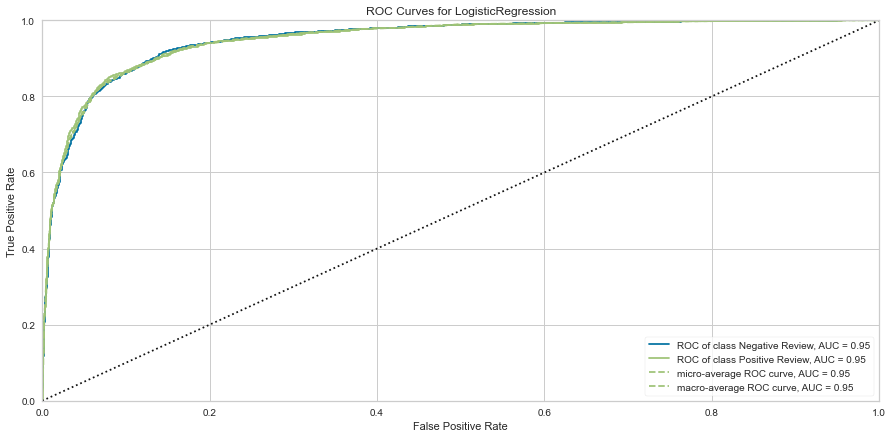

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [103]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(logreg_model, encoder = label_encoder, solver = 'liblinear')

#fit the ROC curve to the test data
roc_curve.fit(x_test_vector, y_test)
#evaluate the model on the test data
roc_curve.score(x_test_vector, y_test)  
roc_curve.show()

### 10. Pick another classification model you learned about this week and repeat steps (5) – (9).

In [110]:
# RANDOM FORESTS

# https://analyticsindiamag.com/7-types-classification-algorithms/

### 5. Train a classification regression model using the training data.

In [111]:
#import Random Forest regression model
from sklearn.ensemble import RandomForestClassifier

#instantiate the Random Forest regression model 
rfm = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features=None, min_samples_leaf=30)

In [112]:
#fit the model to the training set
rfm.fit(x_train_vector, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=101)

### 6. Find the model accuracy on test set and create a confusion matrix for the test set predictions.

Model Accuracy: 76.58%


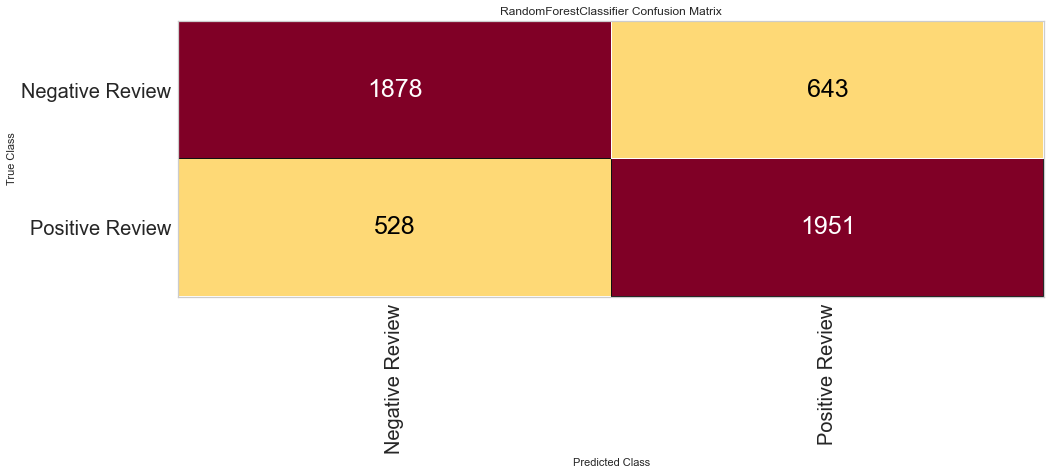

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [107]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
#classes = ['Negative Review','Positive Review']
# Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.
label_encoder = {0: 'Negative Review', 1: 'Positive Review'}

#initialize the confusion matrix
cm = ConfusionMatrix(rfm, encoder = label_encoder,  percent=False) #update model to rfm

#fit the test set to the confusion matrix
cm.fit(x_test_vector, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(x_test_vector, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

### 8. Get the precision, recall, and F1-score for the test set predictions.

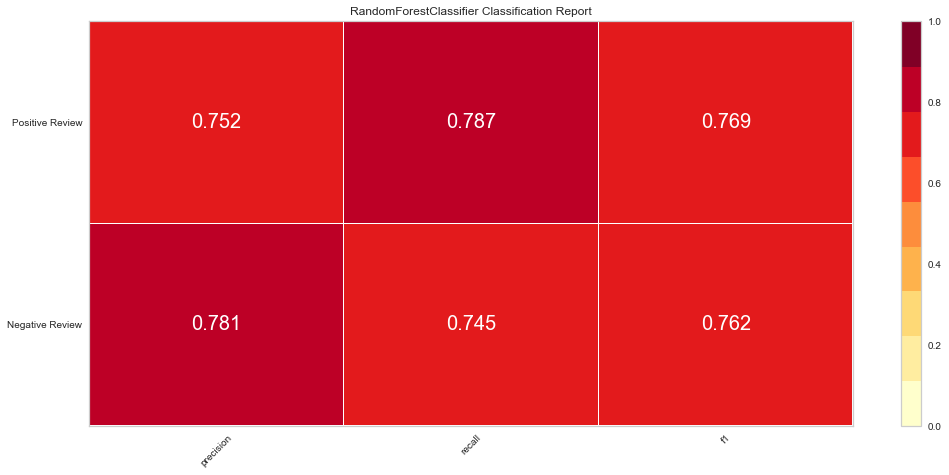

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [108]:
#get precision, recall, and F1-score from the classification report
#set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

#instantiate the classification report
class_report = ClassificationReport(rfm, encoder = label_encoder) #update model to rfm

#fit the classification report to the test data
class_report.fit(x_train_vector, y_test)  
#evaluate the model on the test data
class_report.score(x_test_vector, y_test)  
class_report.show()

### 9. Create a ROC curve for the test set.

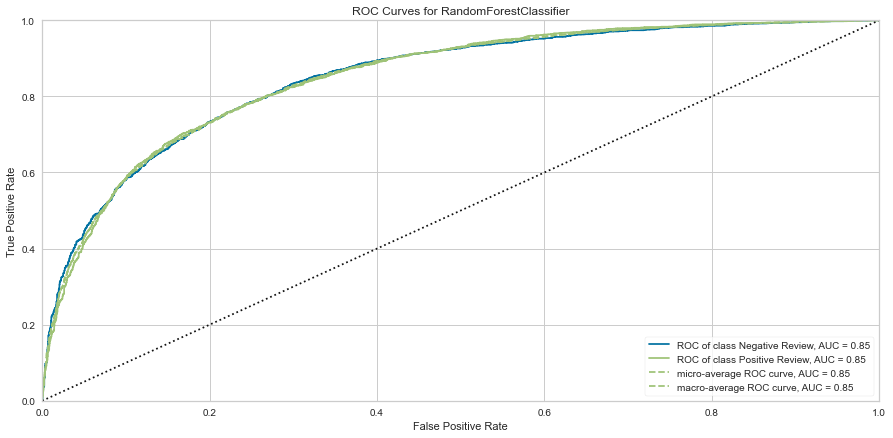

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [109]:
# ROC and AUC
#Instantiate the visualizer
roc_curve = ROCAUC(rfm, encoder = label_encoder, solver = 'liblinear')  #update model to rfm

#fit the ROC curve to the test data
roc_curve.fit(x_test_vector, y_test)
#evaluate the model on the test data
roc_curve.score(x_test_vector, y_test)  
roc_curve.show()